<a href="https://colab.research.google.com/github/OP-Tony/Image_Recognition_CatVsDog/blob/main/Image_recognition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maverick1307","key":"7e03574fe1a6d60b2d93c101f96880fb"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"train shape: {x_train.shape}, test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train shape: (60000, 28, 28), test shape: (10000, 28, 28)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"train shape: {x_train.shape}")

train shape: (60000, 28, 28, 1)


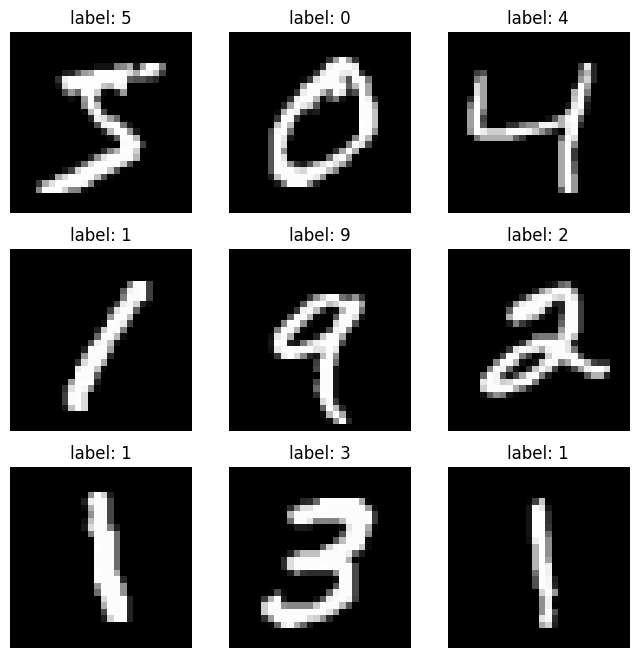

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10/255.0
x_test_c10 = x_test_c10/255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9004 - loss: 0.3329 - val_accuracy: 0.9838 - val_loss: 0.0581
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9853 - val_loss: 0.0457
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9876 - val_loss: 0.0405
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9946 - loss: 0.0152 - val_accuracy: 0.9890 - val_loss: 0.0428


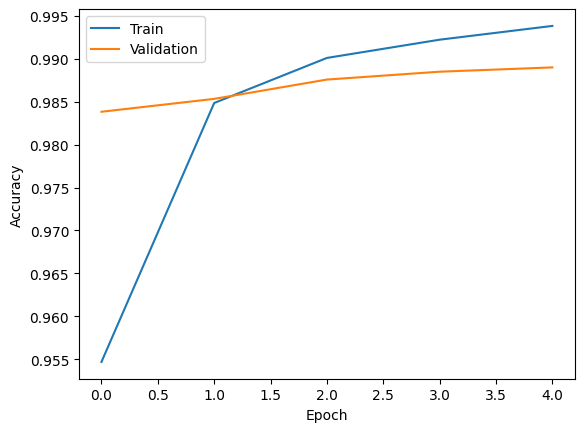

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9869 - loss: 0.0399
Test accuracy: {test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 81ms/step - accuracy: 0.3338 - loss: 1.8079 - val_accuracy: 0.4640 - val_loss: 1.5418
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 79ms/step - accuracy: 0.5205 - loss: 1.3519 - val_accuracy: 0.5701 - val_loss: 1.2121
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5780 - loss: 1.2047 - val_accuracy: 0.6453 - val_loss: 1.0315
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6103 - loss: 1.1119 - val_accuracy: 0.6508 - val_loss: 1.0057
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6327 - loss: 1.0705 - val_accuracy: 0.6609 - val_loss: 0.9930
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6409 - loss: 1.0383 - val_accuracy: 0.6889 - val_loss: 0.8975
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.6505 - loss: 1.0059 - val_accuracy: 0.6541 - val_loss: 1.0419
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6633 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1000
           1       0.73      0.90      0.81      1000
           2       0.81      0.40      0.54      1000
           3       0.63      0.36      0.46      1000
           4       0.69      0.65      0.67      1000
           5       0.57      0.73      0.64      1000
           6       0.66      0.86      0.75      1000
           7       0.72      0.76      0.74      1000
           8       0.84      0.79      0.81      1000
           9       0.67      0.85      0.74      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1000
           1       0.73      0.90      0.81      1000
           2       0.81      0.40   

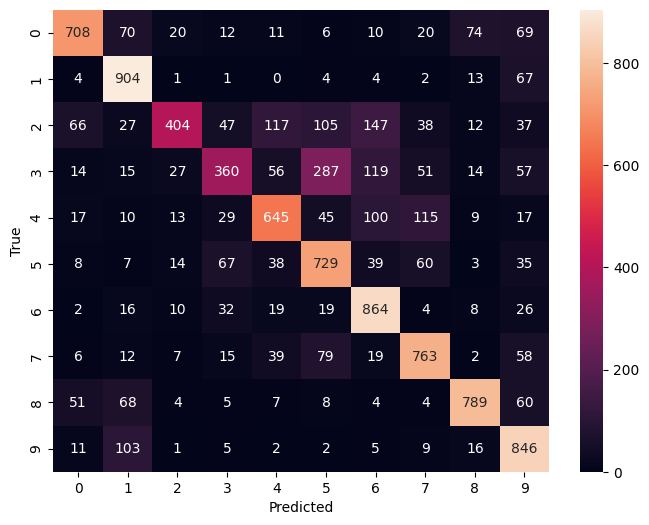

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))
print(classification_report(y_test_c10,y_pred_c10))
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:00<00:00, 218MB/s]
100% 218M/218M [00:00<00:00, 251MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator( rescale=1./255,validation_split=0.2 )
train_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32, class_mode='binary', subset='training')
validation_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32, class_mode='binary', subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=validation_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.7881 - loss: 0.5350 - val_accuracy: 0.7985 - val_loss: 0.5097
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.7970 - loss: 0.4996 - val_accuracy: 0.7985 - val_loss: 0.5114
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.7970 - loss: 0.4871 - val_accuracy: 0.7980 - val_loss: 0.5158
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.8018 - loss: 0.4680 - val_accuracy: 0.7985 - val_loss: 0.5245
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.7985 - loss: 0.4585 - val_accuracy: 0.7980 - val_loss: 0.5293


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=validation_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1973s 8s/step - accuracy: 0.7965 - loss: 0.4907 - val_accuracy: 0.7980 - val_loss: 0.5263
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1853s 7s/step - accuracy: 0.7979 - loss: 0.4576 - val_accuracy: 0.7975 - val_loss: 0.5277
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1813s 7s/step - accuracy: 0.8015 - loss: 0.4261 - val_accuracy: 0.7975 - val_loss: 0.5275


In [ ]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step


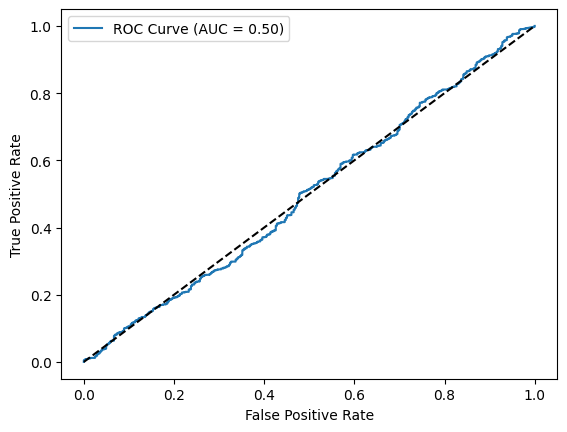

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(validation_generator)
fpr, tpr, _ = roc_curve(validation_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'Dog.jpeg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving Dog.jpeg to Dog (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Dog


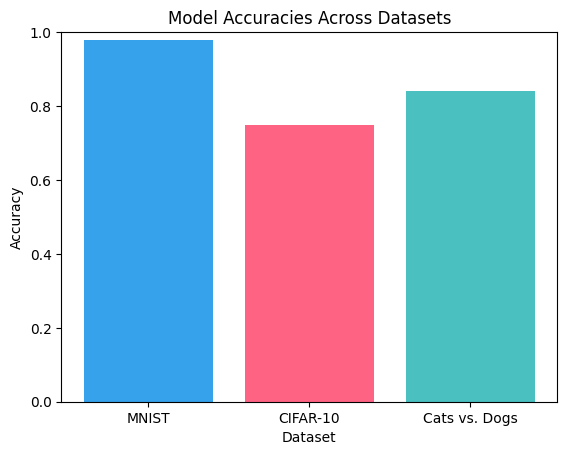

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.99, 0.79, 0.81]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()